# Capstone Project 1 Data Wrangling
### Molly McNamara

The primary dataset consists of daily levels of 4 primary air pollutants (Nitrogen Dioxide, Sulphur 
Dioxide, Carbon Monoxide and Ozone) and their air quality indices from major cities across the United 
States between 2000 and 2016. The data is sourced from the United States Environmental Protection 
Agency. 

#### Import pandas package

In [51]:
import pandas as pd

#### Import the pollution dataset

In [52]:

pollution = pd.read_csv('~/Desktop/pollution_us_2000_2016.csv', index_col='Unnamed: 0')

C:\Users\mmcnamara\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Initial assessment of dataset

A very preliminary assessment of the dataset was performed to look at its current state.

In [53]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746661 entries, 0 to 24603
Data columns (total 28 columns):
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(9), object(9)
memory usage: 386.5+ MB


The dataset consists of 1,746,661 observations with 28 columns.  The head of the dataset was next viewed to get a general idea of what the real data looked like.

In [54]:
pollution.head()


,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


A number of columns will not be used in the analysis; for example, address of the environmental monitor or measurement units.  These were removed to simplify the dataset.

In [55]:
pollution = pollution.drop(['State Code','County Code','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
pollution.head()

,Site Num,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,3002,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,...,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


#### Removal of duplicate data

Further investigation of the dataset reveals that there are duplicate/multiple rows for each site on a given day.  This can be solved by grouping by date and site (and location information) and then keeping only the mean.

In [56]:
 pollution = pollution.groupby(['Site Num','Date Local', 'State', 'County', 'City']).mean().reset_index()
pollution.head()

,Site Num,Date Local,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1,2000-01-01,California,San Diego,Chula Vista,10.913043,20.0,0.0,19.0,0.031625,...,9.0,36.0,2.064907,2.65,6.0,4.0,0.603382,0.95,8.0,9.0
1,1,2000-01-02,California,San Diego,Chula Vista,10.869565,35.0,18.0,33.0,0.026833,...,9.0,34.0,1.748136,2.00,1.0,3.0,0.560145,1.15,20.5,10.0
2,1,2000-01-03,California,San Diego,Chula Vista,27.782609,45.0,17.0,42.0,0.011333,...,9.0,19.0,2.172671,3.00,14.0,4.0,1.174003,2.30,21.0,20.0
3,1,2000-01-04,California,San Diego,Chula Vista,33.869565,58.0,17.0,55.0,0.009417,...,8.0,18.0,2.992546,4.65,16.5,7.0,1.249003,2.25,21.0,22.0
4,1,2000-01-05,California,San Diego,Chula Vista,34.181818,50.0,18.0,47.0,0.011875,...,10.0,23.0,3.132575,3.80,9.0,6.0,1.588258,3.05,15.0,24.0


The dataset now shows one row for each date for each site.  The reduced number of observations can be confirmed with another look at the dataset info, which shows there are now 412,855 rows with 21 columns.

In [57]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412856 entries, 0 to 412855
Data columns (total 21 columns):
Site Num             412856 non-null int64
Date Local           412856 non-null object
State                412856 non-null object
County               412856 non-null object
City                 412856 non-null object
NO2 Mean             412856 non-null float64
NO2 1st Max Value    412856 non-null float64
NO2 1st Max Hour     412856 non-null float64
NO2 AQI              412856 non-null float64
O3 Mean              412856 non-null float64
O3 1st Max Value     412856 non-null float64
O3 1st Max Hour      412856 non-null float64
O3 AQI               412856 non-null float64
SO2 Mean             412856 non-null float64
SO2 1st Max Value    412856 non-null float64
SO2 1st Max Hour     412856 non-null float64
SO2 AQI              412856 non-null float64
CO Mean              412856 non-null float64
CO 1st Max Value     412856 non-null float64
CO 1st Max Hour      412856 non-null flo

#### Conversion of data column

Given that this dataset is time-series data, the Date Local column should be converted to a datetime format.

In [58]:
pollution['Date Local'] = pd.to_datetime(pollution['Date Local'])

In [59]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412856 entries, 0 to 412855
Data columns (total 21 columns):
Site Num             412856 non-null int64
Date Local           412856 non-null datetime64[ns]
State                412856 non-null object
County               412856 non-null object
City                 412856 non-null object
NO2 Mean             412856 non-null float64
NO2 1st Max Value    412856 non-null float64
NO2 1st Max Hour     412856 non-null float64
NO2 AQI              412856 non-null float64
O3 Mean              412856 non-null float64
O3 1st Max Value     412856 non-null float64
O3 1st Max Hour      412856 non-null float64
O3 AQI               412856 non-null float64
SO2 Mean             412856 non-null float64
SO2 1st Max Value    412856 non-null float64
SO2 1st Max Hour     412856 non-null float64
SO2 AQI              412856 non-null float64
CO Mean              412856 non-null float64
CO 1st Max Value     412856 non-null float64
CO 1st Max Hour      412856 non-

#### Assessment of missing data

Missing data can impact future analysis; the next step is to identify any null/empty fields.

In [60]:
pollution.isnull().any()

Site Num             False
Date Local           False
State                False
County               False
City                 False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI              False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI                True
dtype: bool

It appears only the CO AQI column is misinsg data.  To determine the extent of the missing values, they are summed.

In [61]:
#Determine the extent of the NA values
print((pollution[['CO AQI']] == 0).sum())

CO AQI    16918
dtype: int64


There appear to be 16,918 null CO AQI values in the dataset.  This was visualized using the missingno Python package.  It may be that one or more cities have a significant gap in the CO AQI generation.  

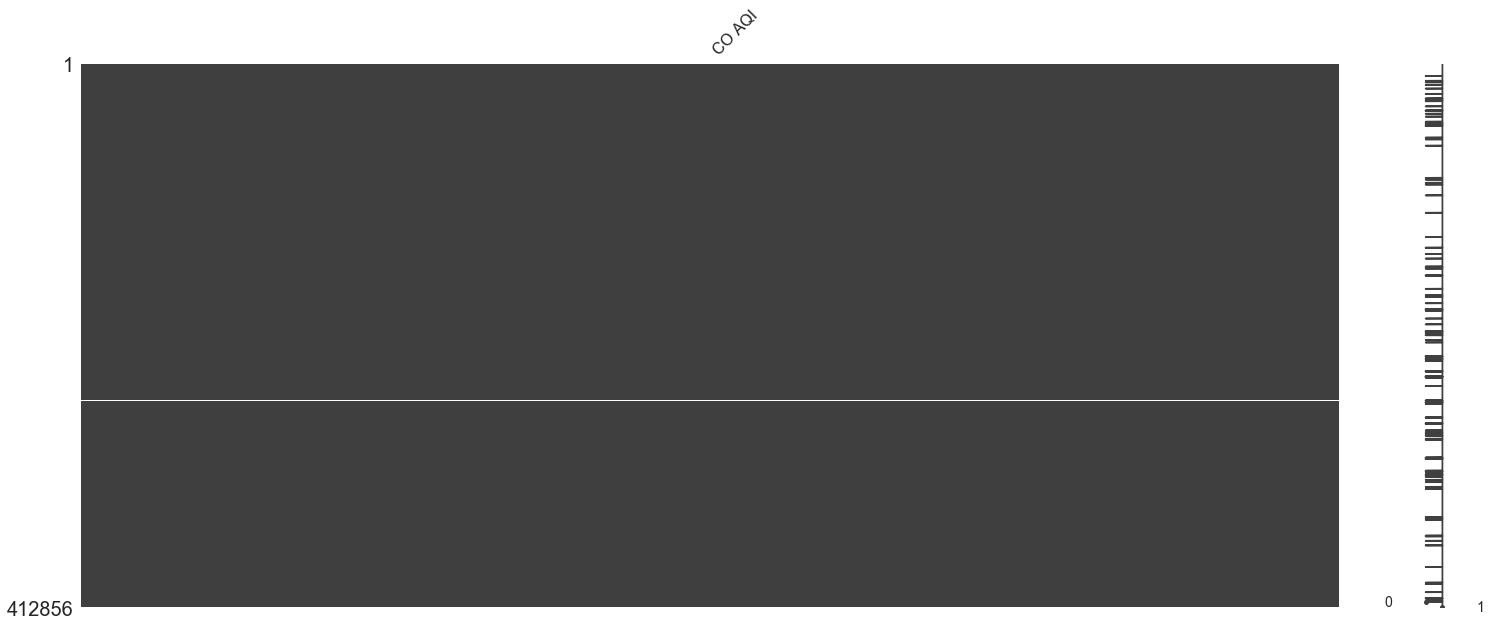

In [62]:
import missingno as mn
mn.matrix(pollution[['CO AQI']])

The rows with missing AQI for CO AQI are subset and investigated.  It appears they cover more than 1 monitoring site and a range of dates.

In [63]:
missing = pollution[pollution['CO AQI'] == 0]
missing

,Site Num,Date Local,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
3990,1,2014-11-04,Pennsylvania,Adams,Not in a city,4.900000,11.0,21.0,10.0,0.033091,...,23.0,38.0,0.358334,1.00,1.0,1.0,0.007500,0.05,10.5,0.0
3991,1,2014-11-05,Pennsylvania,Adams,Not in a city,2.600000,6.0,0.0,6.0,0.033389,...,1.0,41.0,0.422619,1.00,4.5,1.0,0.000000,0.00,0.0,0.0
3993,1,2014-11-07,Pennsylvania,Adams,Not in a city,0.333333,2.0,1.0,2.0,0.028125,...,11.0,29.0,0.243750,1.50,4.5,3.0,0.000000,0.00,0.0,0.0
3994,1,2014-11-08,Pennsylvania,Adams,Not in a city,1.416667,3.0,4.0,3.0,0.027250,...,10.0,30.0,0.493750,3.00,4.5,6.0,0.000000,0.00,0.0,0.0
3995,1,2014-11-09,Pennsylvania,Adams,Not in a city,0.583333,2.0,0.0,2.0,0.027542,...,12.0,29.0,0.000000,0.00,1.0,0.0,0.002084,0.05,0.0,0.0
4029,1,2014-12-16,Pennsylvania,Adams,Not in a city,12.250000,17.0,18.0,16.0,0.007250,...,8.0,8.0,0.164583,1.65,1.0,3.0,0.004546,0.05,15.5,0.0
4030,1,2014-12-17,Pennsylvania,Adams,Not in a city,4.208333,11.0,0.0,10.0,0.013917,...,23.0,20.0,0.000000,0.00,1.0,0.0,0.000000,0.00,0.0,0.0
4033,1,2014-12-20,Pennsylvania,Adams,Not in a city,1.333333,7.0,17.0,7.0,0.030333,...,8.0,31.0,0.283334,1.00,9.5,1.0,0.000000,0.00,0.0,0.0
4034,1,2014-12-21,Pennsylvania,Adams,Not in a city,1.666667,3.0,17.0,3.0,0.027625,...,9.0,29.0,0.987500,6.30,10.0,11.0,0.000000,0.00,0.0,0.0
4035,1,2014-12-22,Pennsylvania,Adams,Not in a city,8.291667,21.0,22.0,20.0,0.015250,...,0.0,23.0,0.868750,4.15,10.5,7.0,0.000000,0.00,0.0,0.0


To address these missing values, the data can be interpolated from surrounding values in order to fill in the missing information.

In [64]:
pollution.interpolate()

,Site Num,Date Local,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1,2000-01-01,California,San Diego,Chula Vista,10.913043,20.0,0.0,19.0,0.031625,...,9.0,36.0,2.064907,2.65,6.0,4.0,0.603382,0.9500,8.0,9.0
1,1,2000-01-02,California,San Diego,Chula Vista,10.869565,35.0,18.0,33.0,0.026833,...,9.0,34.0,1.748136,2.00,1.0,3.0,0.560145,1.1500,20.5,10.0
2,1,2000-01-03,California,San Diego,Chula Vista,27.782609,45.0,17.0,42.0,0.011333,...,9.0,19.0,2.172671,3.00,14.0,4.0,1.174003,2.3000,21.0,20.0
3,1,2000-01-04,California,San Diego,Chula Vista,33.869565,58.0,17.0,55.0,0.009417,...,8.0,18.0,2.992546,4.65,16.5,7.0,1.249003,2.2500,21.0,22.0
4,1,2000-01-05,California,San Diego,Chula Vista,34.181818,50.0,18.0,47.0,0.011875,...,10.0,23.0,3.132575,3.80,9.0,6.0,1.588258,3.0500,15.0,24.0
5,1,2000-01-06,California,San Diego,Chula Vista,31.318182,51.0,20.0,48.0,0.011292,...,8.0,20.0,2.844697,3.65,8.0,6.0,1.389584,2.7500,4.0,24.0
6,1,2000-01-07,California,San Diego,Chula Vista,30.608696,43.0,8.0,41.0,0.011500,...,9.0,21.0,3.222671,9.15,11.0,17.0,1.176359,2.0500,3.5,19.0
7,1,2000-01-08,California,San Diego,Chula Vista,31.695652,48.0,11.0,45.0,0.008083,...,9.0,15.0,3.985715,5.80,10.5,9.0,1.488497,2.7000,21.0,24.0
8,1,2000-01-09,California,San Diego,Chula Vista,33.043478,57.0,18.0,54.0,0.013417,...,10.0,25.0,2.215838,4.15,13.0,7.0,1.314221,2.4500,10.5,26.0
9,1,2000-01-10,California,San Diego,Chula Vista,35.304348,50.0,19.0,47.0,0.015292,...,10.0,31.0,2.503726,3.80,10.5,6.0,1.372192,2.1000,9.5,20.0


Finally a series of boxplots are generated by state for each pollutant's AQI value to look for any strong outliers.

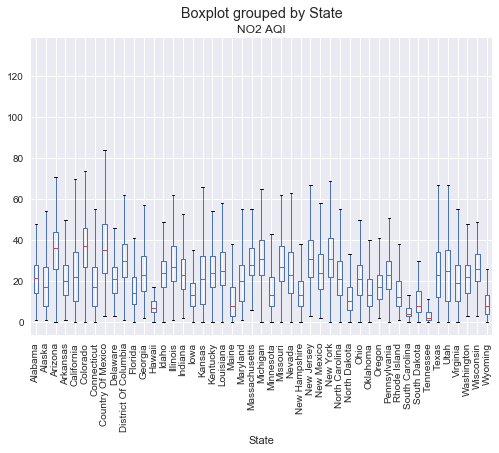

In [65]:
# Import necessary module
import matplotlib.pyplot as plt

# Create the boxplot for NO2 AQI
pollution.boxplot(column='NO2 AQI', by='State', rot=90)
# Display the plot
plt.show()


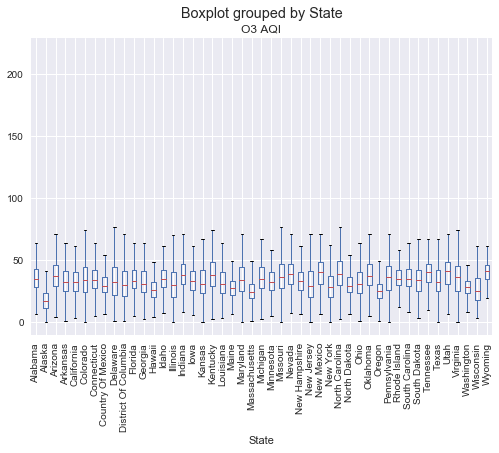

In [66]:
# Create the boxplot for O3 AQI
pollution.boxplot(column='O3 AQI', by='State', rot=90)
# Display the plot
plt.show()

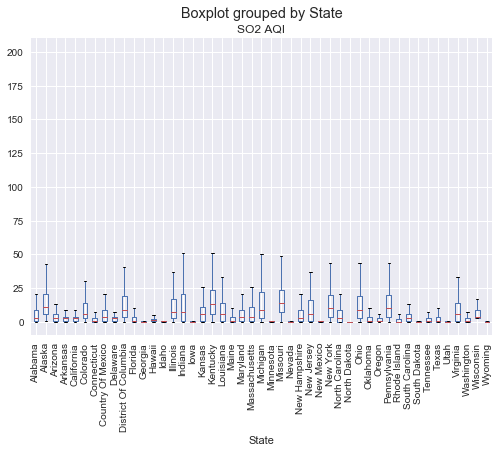

In [67]:
# Create the boxplot for SO2 AQI
pollution.boxplot(column='SO2 AQI', by='State', rot=90)
# Display the plot
plt.show()

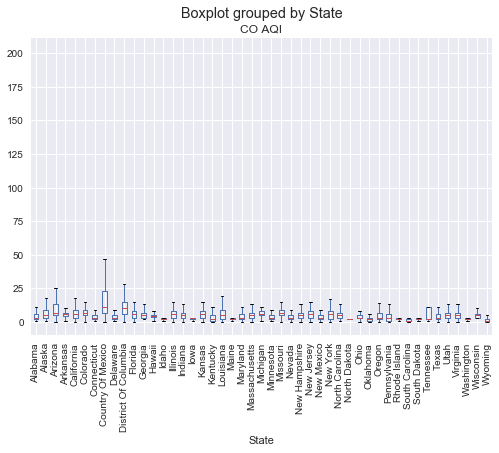

In [68]:
# Create the boxplot for CO AQI
pollution.boxplot(column='CO AQI', by='State', rot=90)
# Display the plot
plt.show()

While there seem to be regional differences in AQI values, there don't as yet seem to be AQI values that are strong outliers from the entire dataset.

The cleaned dataframe was saved as a new CSV.

In [69]:
pollution.to_csv('cleanpollution.csv')